In [3]:
import sys
sys.path.append('/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-Thesis/src')
import pickle as pkl
import matplotlib.pyplot as plt
from src.utils.baselines import avg_deltacon_similarity, avg_frobenius_distance, avg_procrustes_distance, evaluate_baseline
from src.utils.functions import dist_labels_to_changepoint_labels, normalise_statistics

## Traditional Network Metrics

In [ ]:
with open('../data/graphs/exports_graphs.pkl', 'rb') as file:
    data = pkl.load(file)

true_cps = [1962, 1967, 1973, 1978, 1981, 1989, 1993, 1996, 2002, 2007, 2012, 2014, 2016]

phases = []
p = 0
for i, g in enumerate(data):
    year = i+1962
    if year in true_cps and year != 1962:
        p += 1
        
    phases.append(p)

true_labels = dist_labels_to_changepoint_labels(phases)

In [5]:
deltacon, dc_times = avg_deltacon_similarity(data, window_length=3,diff=True)
deltacon_times = [x+1962 for x in dc_times]

frobenius, fb_times = avg_frobenius_distance(data, window_length=3,diff=True)
fb_times = [x+1962 for x in fb_times]

procrustes, pr_times = avg_procrustes_distance(data, window_length=3,diff=True)
pr_times = [x+1962 for x in pr_times]

In [6]:
deltacon_norm = normalise_statistics(deltacon)
frobenius_norm = normalise_statistics(frobenius)
procrustes_norm = normalise_statistics(procrustes)

In [7]:
detected_cps = []
for method in ['deltacon','frobenius', 'procrustes']:
    ari, f1, cps = evaluate_baseline(method, test_data=data, test_labels=phases, window_length=3, tolerance=3, n_eigen=4, diff=True)
    detected_cps.append(cps)
    print("Method : ", method)
    print("F1 test and ARI test : ", f1, ari)

Method :  deltacon
F1 test and ARI test :  0.42105263157894735 0.2576143624318921
Method :  frobenius
F1 test and ARI test :  0.3508771929824561 0.19992518295106498
Method :  procrustes
F1 test and ARI test :  0.3582089552238806 0.09771369826934351


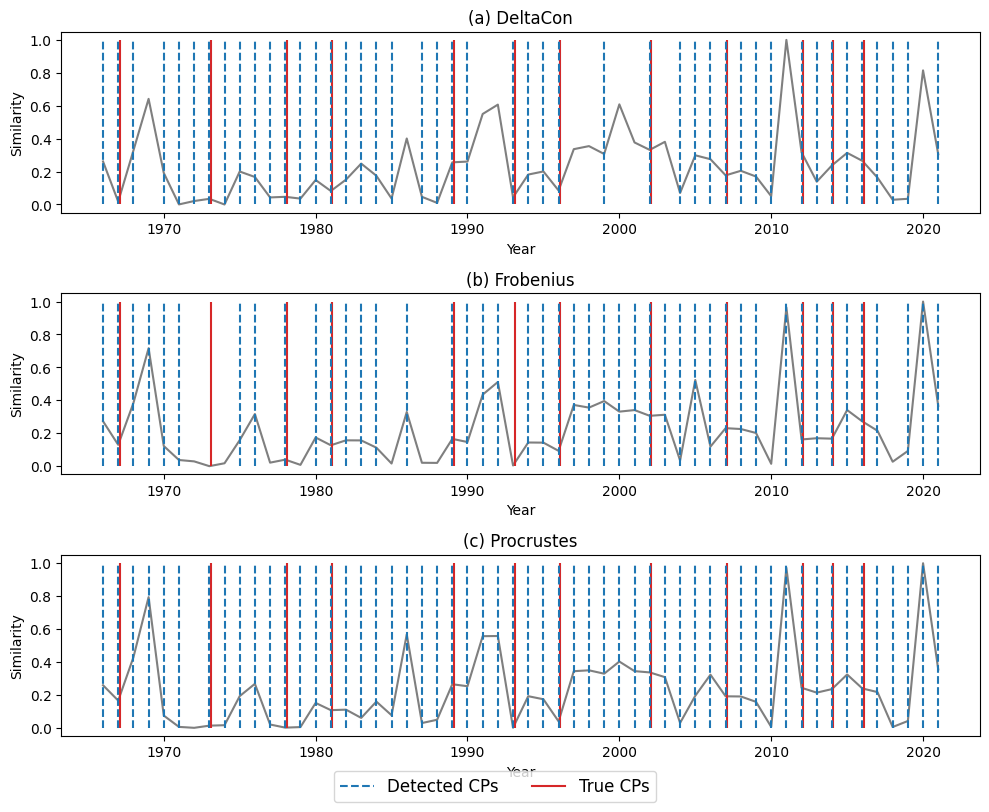

In [8]:
import matplotlib.lines as mlines
fig, axs = plt.subplots(3, 1, figsize=(10,8))

axs[0].plot(deltacon_times, deltacon_norm, label='DeltaCon', color='tab:grey')
axs[1].plot(fb_times, frobenius_norm, label='Frobenius', color='tab:grey')
axs[2].plot(pr_times, procrustes_norm, label='Procrustes', color='tab:grey')

adjusted_cps = [i+0.1 for i in true_cps if i > 1962]
labels = ['(a) DeltaCon', '(b) Frobenius', '(c) Procrustes']
detected_times = [deltacon_times, fb_times, procrustes]

for i in range(3):
    indices = detected_cps[i]
    selected_values = detected_cps[i]+1962
    
    axs[i].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
    axs[i].vlines(x=selected_values, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
    axs[i].grid(visible=False)
    axs[i].set_xlabel(rf'Year')
    axs[i].set_ylabel(rf'Similarity')
    axs[i].set_title(labels[i])

handles = [mlines.Line2D([], [], color='tab:blue', linestyle='--', label='Detected CPs'),
           mlines.Line2D([], [], color='tab:red', linestyle='-', label='True CPs')]

fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.02), fontsize='large')

plt.tight_layout()
plt.show()

## Siamese-GNN Change-Points

In [9]:
with open("../cpd-results/sage-gdp-mis-norm/avg_similarity.p", 'rb') as file:
    avg_sim_mis_norm_gdp = pkl.load(file)

In [14]:
with open("../results/test_results/NCPD_07_22_16:14:19_window_2_detection/avg_similarity.p", 'rb') as file:
    avg_sim_logged = pkl.load(file)

In [43]:
detected_cps_norm_gdp = [4, 10, 13, 16, 19, 27, 31, 34, 41, 44, 46, 50, 53]
detected_cps_logged = [2, 5, 9, 11, 16, 19, 27, 31, 34, 40, 45, 50, 52]
detected_cps_norm_nogdp = [5, 11, 15, 19, 27, 31, 34, 40, 45, 50]

detected_times_norm_gdp = [i+1962 for i in detected_cps_norm_gdp]
detected_times_logged = [i+1962 for i in detected_cps_logged]
detected_times_norm_no_gdp = [i+1962 for i in detected_cps_norm_nogdp]
times = range(1962,2018)

true_cps = [0, 5, 11, 16, 19, 27, 31, 34, 40, 45, 50, 52, 54]
selected_times = [i+1962 for i in true_cps]

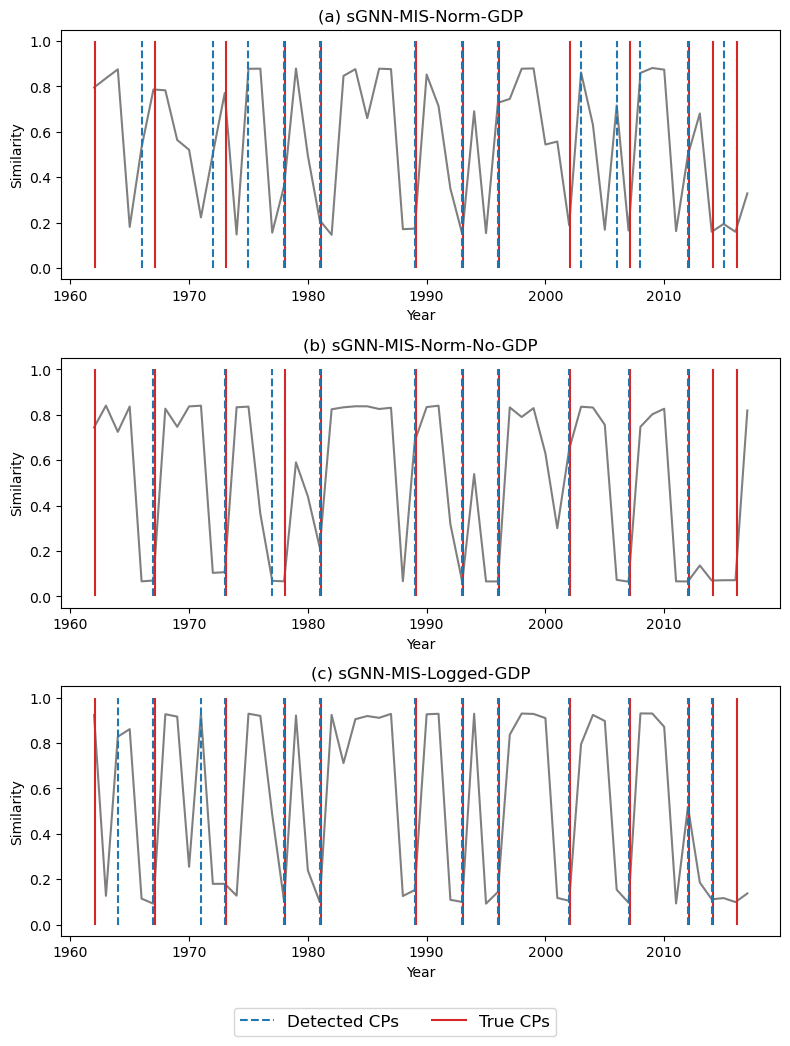

In [60]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(8,10))

# Plot just one line, for example, the LAD line
axs[0].plot(times, avg_sim_norm_gdp, label='sGNN-MIS-Norm-GDP', color='tab:grey')
axs[1].plot(times, avg_sim_norm_nogdp, label='sGNN-MIS-Norm-No-GDP', color='tab:grey')
axs[2].plot(times, avg_sim_logged, label='sGNN-MIS-Logged-GDP', color='tab:grey')

adjusted_cps = [i+0.1 for i in selected_times]

axs[0].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[0].vlines(x=detected_times_norm_gdp, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[0].grid(visible=False)
axs[0].set_xlabel(rf'Year')
axs[0].set_ylabel(rf'Similarity')
axs[0].set_title('(a) sGNN-MIS-Norm-GDP')

axs[1].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[1].vlines(x=detected_times_norm_no_gdp, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[1].grid(visible=False)
axs[1].set_xlabel(rf'Year')
axs[1].set_ylabel(rf'Similarity')
axs[1].set_title('(b) sGNN-MIS-Norm-No-GDP')

axs[2].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[2].vlines(x=detected_times_logged, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[2].grid(visible=False)
axs[2].set_xlabel(rf'Year')
axs[2].set_ylabel(rf'Similarity')
axs[2].set_title('(c) sGNN-MIS-Logged-GDP')

handles = [mlines.Line2D([], [], color='tab:blue', linestyle='--', label='Detected CPs'),
           mlines.Line2D([], [], color='tab:red', linestyle='-', label='True CPs')]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05), fontsize='large')

plt.tight_layout()
plt.show()